In [93]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [94]:
!dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 7496-5BB4

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\projects\DS_lessons

27.10.2020  06:13    <DIR>          .
27.10.2020  06:13    <DIR>          ..
27.10.2020  05:42    <DIR>          .ipynb_checkpoints
18.10.2020  10:56           116я198 AFKS.csv
28.09.2020  09:51               323 appending_files.py
18.10.2020  10:57    <DIR>          Companies
17.10.2020  09:38         3я689я225 Companies'_stocks_updated.csv
17.10.2020  10:14         3я849я482 Companies'_stocks_updated.xlsx
23.10.2020  19:55               570 debug.log
22.09.2020  18:47    <DIR>          env
27.10.2020  05:42            14я526 Filling data.ipynb
18.10.2020  10:56           116я505 GAZP.csv
27.10.2020  06:13           442я383 Grafic_akcii-Copy1.ipynb
26.10.2020  19:45           413я488 Grafic_akcii.ipynb
18.10.2020  10:56           108я755 KMAZ.csv
22.09.2020  22:10            61я228 Lesson1.ipynb
23.09.2020  15:19            13я597 Lesson2.ipynb
23.09.2020  15:47            23

In [95]:
dts = pd.read_csv('qGAZP.csv', sep=';')
dts

,Unnamed: 0,Unnamed: 0.1,COMPANY,DATE,OPEN,CLOSE
0,0,26068,GAZP,2008-01-10,353.56,352.40
1,1,26069,GAZP,2008-01-11,352.75,355.91
2,2,26069,GAZP,2008-01-12,352.75,355.91
3,3,26069,GAZP,2008-01-13,352.75,355.91
4,4,26070,GAZP,2008-01-14,355.27,363.70
...,...,...,...,...,...,...
4643,4643,29271,GAZP,2020-09-26,173.62,173.77
4644,4644,29271,GAZP,2020-09-27,173.62,173.77
4645,4645,29272,GAZP,2020-09-28,174.24,172.66
4646,4646,29273,GAZP,2020-09-29,172.67,171.40


In [96]:
dts

,Unnamed: 0,Unnamed: 0.1,COMPANY,DATE,OPEN,CLOSE
0,0,26068,GAZP,2008-01-10,353.56,352.40
1,1,26069,GAZP,2008-01-11,352.75,355.91
2,2,26069,GAZP,2008-01-12,352.75,355.91
3,3,26069,GAZP,2008-01-13,352.75,355.91
4,4,26070,GAZP,2008-01-14,355.27,363.70
...,...,...,...,...,...,...
4643,4643,29271,GAZP,2020-09-26,173.62,173.77
4644,4644,29271,GAZP,2020-09-27,173.62,173.77
4645,4645,29272,GAZP,2020-09-28,174.24,172.66
4646,4646,29273,GAZP,2020-09-29,172.67,171.40


In [99]:
dataset2 = dts[dts['DATE'].dt.strftime('%Y.%m.%d').between('2014.01.01', '2020.12.31')]

AttributeError: Can only use .dt accessor with datetimelike values

In [4]:
dataset = pd.read_csv('qGAZP.csv', ';', index_col=['DATE'], parse_dates=['DATE'], dayfirst=True)

## Избавляемся от ненужных столбцов

In [5]:
dataset = dataset.drop(['COMPANY'], axis=1)

In [6]:
dataset = dataset.drop(['CLOSE'], axis=1)

In [7]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [8]:
dataset = dataset.drop(['Unnamed: 0.1'], axis=1)

In [9]:
dataset

,OPEN
DATE,
2008-01-10,353.56
2008-01-11,352.75
2008-01-12,352.75
2008-01-13,352.75
2008-01-14,355.27
...,...
2020-09-26,173.62
2020-09-27,173.62
2020-09-28,174.24


In [76]:
dataset2 = dataset[dataset['DATE'].dt.strftime('%Y.%m.%d').between('2014.01.01', '2020.12.31')]

KeyError: 'DATE'

# Строим график

In [10]:
dt = dataset

<AxesSubplot:xlabel='DATE'>

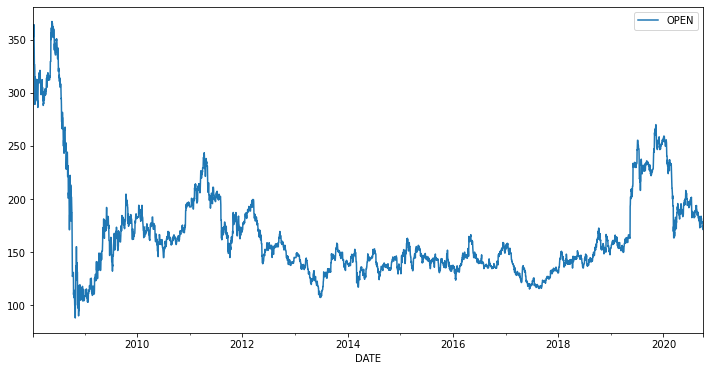

In [11]:
dt.plot(figsize=(12,6))

### Данные с недельным интервалом

<AxesSubplot:xlabel='DATE'>

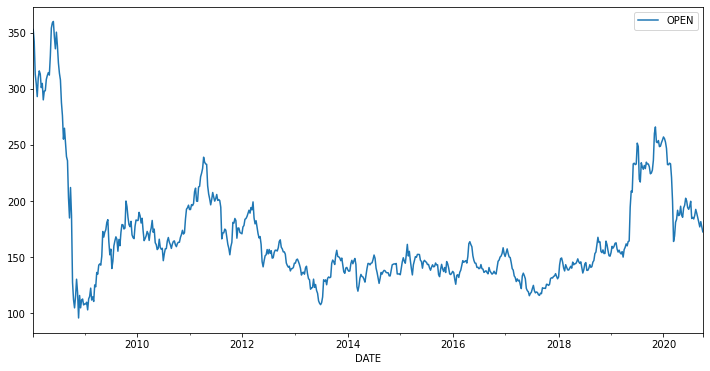

In [12]:
dtw = dt.resample('W').median()
dtw.plot(figsize=(12,6))

In [13]:
dtw

,OPEN
DATE,
2008-01-13,352.75
2008-01-20,342.00
2008-01-27,313.10
2008-02-03,304.60
2008-02-10,293.00
...,...
2020-09-06,181.28
2020-09-13,177.05
2020-09-20,181.72


In [14]:
dtw.to_csv('week_AFSK.csv', sep=';')

### Гистограмма с полными данными

,OPEN
count,4648.000000
mean,166.501181
std,45.951184
min,88.000000
25%,138.360000
50%,152.000000
75%,181.157500
max,367.000000


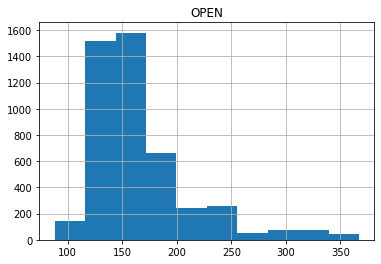

In [15]:
idt = dt.describe()
dt.hist()
idt

### Гистограмма с недельным интервалом

,OPEN
count,665.000000
mean,166.685083
std,46.169568
min,96.000000
25%,138.580000
50%,152.220000
75%,181.280000
max,359.880000


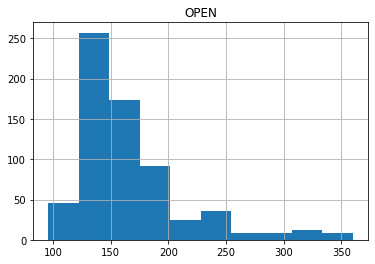

In [16]:
idtw = dtw.describe()
dtw.hist()
idtw

# Расчет коэффициента вариации

### Полные данные

In [17]:
V = idt.loc['std']/idt.loc['mean']

In [18]:
V

OPEN    0.275981
dtype: float64

### Недельные данные

In [19]:
Vw = idtw.loc['std']/idtw.loc['mean']

In [20]:
Vw

OPEN    0.276987
dtype: float64

# Тест Харки-Бера

### Полные данные

In [21]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(dt, axis=1)
jb_test

(array([0.375, 0.375, 0.375, ..., 0.375, 0.375, 0.375]),
 array([0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [22]:
a = np.vstack([jb_test])
a

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
idt = SimpleTable(a, row)
idt

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Недельные данные


In [24]:
roww =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_testw = sm.stats.stattools.jarque_bera(dtw, axis=1)
jb_testw

(array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
      

In [25]:
aw = np.vstack([jb_testw])
aw

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
idtw = SimpleTable(aw, roww)
idtw

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Тест Дикки-Фуллера

### Полные данные

In [27]:
dt2 = dt.dropna(how='any')

In [28]:
dt2

,OPEN
DATE,
2008-01-10,353.56
2008-01-11,352.75
2008-01-12,352.75
2008-01-13,352.75
2008-01-14,355.27
...,...
2020-09-26,173.62
2020-09-27,173.62
2020-09-28,174.24


In [29]:
test = sm.tsa.adfuller(dt2)

In [30]:
test_result = [{'adf: ': test[0], 'p-value: ': test[1], 'Critical values: ': test[4]}]
test_result = pd.DataFrame(test_result)
if test[0] > test[4]['5%']:
    test_result[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result[3] = 'единичных корней нет, ряд стационарен'

In [31]:
test_result

,adf:,p-value:,Critical values:,3
0,-3.23997,0.017785,"{'1%': -3.4317668338310092, '5%': -2.862166075...","единичных корней нет, ряд стационарен"


### Недельные данные

In [32]:
dt2w = dtw.dropna(how='any')

In [33]:
dt2w

,OPEN
DATE,
2008-01-13,352.75
2008-01-20,342.00
2008-01-27,313.10
2008-02-03,304.60
2008-02-10,293.00
...,...
2020-09-06,181.28
2020-09-13,177.05
2020-09-20,181.72


In [34]:
testw = sm.tsa.adfuller(dt2w)

In [35]:
test_resultw = [{'adf: ': test[0], 'p-value: ': testw[1], 'Critical values: ': test[4]}]
test_resultw = pd.DataFrame(test_resultw)
if testw[0] > testw[4]['5%']:
    test_resultw[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_resultw[3] = 'единичных корней нет, ряд стационарен'

In [36]:
test_resultw

,adf:,p-value:,Critical values:,3
0,-3.23997,0.001969,"{'1%': -3.4317668338310092, '5%': -2.862166075...","единичных корней нет, ряд стационарен"


### Проверка порядка интегрированного ряда

### Полные данные

In [37]:
dt2diff = dt.diff(periods=1).dropna()

In [38]:
test2 = sm.tsa.adfuller(dt2diff)

In [39]:
test_result2 = [{'adf: ': test2[0], 'p-value: ': test2[1], 'Critical values: ': test2[4]}]
test_result2 = pd.DataFrame(test_result2)
if test2[0] > test2[4]['5%']:
    test_result2[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2[3] = 'единичных корней нет, ряд стационарен'

In [40]:
test_result2

,adf:,p-value:,Critical values:,3
0,-12.500682,2.811057e-23,"{'1%': -3.4317668338310092, '5%': -2.862166075...","единичных корней нет, ряд стационарен"


### Недельные данные

In [41]:
dt2diffw = dtw.diff(periods=1).dropna()

In [42]:
test2w = sm.tsa.adfuller(dt2diffw)

In [43]:
test_result2w = [{'adf: ': test2w[0], 'p-value: ': test2w[1], 'Critical values: ': test2w[4]}]
test_result2w = pd.DataFrame(test_result2w)
if test2w[0] > test2w[4]['5%']:
    test_result2w[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2w[3] = 'единичных корней нет, ряд стационарен'

In [44]:
test_result2w

,adf:,p-value:,Critical values:,3
0,-7.374159,8.811823e-11,"{'1%': -3.440357733229128, '5%': -2.8659559257...","единичных корней нет, ряд стационарен"


### Проверка мат ожидания

In [45]:
#dt2diff.index[len(dt2diff.index)/3]

In [46]:
#m = dt2diff.index[len(dt2diff.index)/2+1]

In [47]:
"""r1 = sm.stats.DescrStatsW(dt2diff[m:])
r2 = sm.stats.DescrStatsW(dt2diff[:m])
prov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]
prov"""

'r1 = sm.stats.DescrStatsW(dt2diff[m:])\nr2 = sm.stats.DescrStatsW(dt2diff[:m])\nprov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]\nprov'

### Полные данные

<AxesSubplot:xlabel='DATE'>

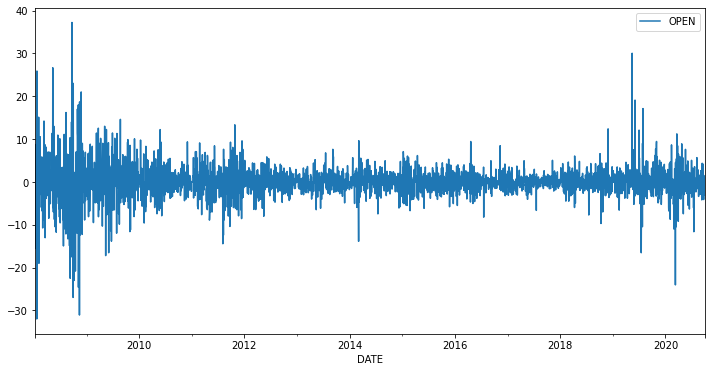

In [48]:
dt2diff.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

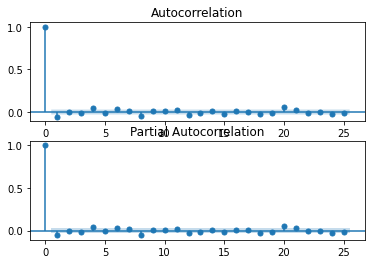

In [49]:
ig = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt2diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt2diff, lags=25, ax=ax2)

### Недельные данные

<AxesSubplot:xlabel='DATE'>

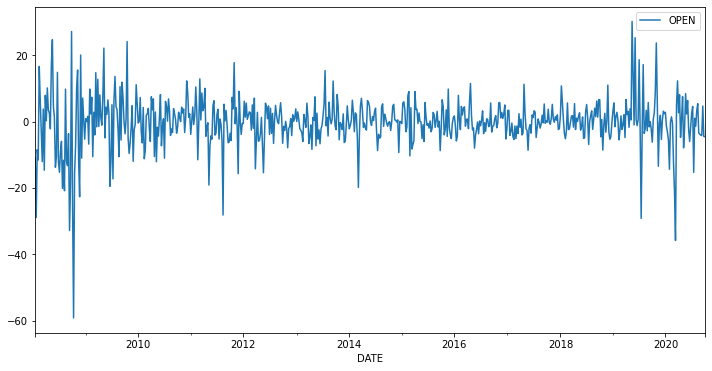

In [50]:
dt2diffw.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

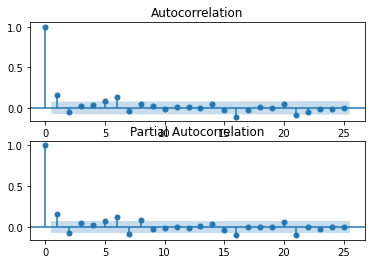

In [51]:
igw = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt2diffw.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt2diffw, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают

### Построение ARIMA модели

### Недельные данные

In [52]:
src_data_modelw = dtw[:'2020-09-29']
modelw =  sm.tsa.arima.ARIMA(src_data_modelw, order=(1,1,1), freq='W').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

In [53]:
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                  664
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2258.847
Date:                Tue, 27 Oct 2020   AIC                           4523.694
Time:                        05:45:54   BIC                           4537.184
Sample:                    01-13-2008   HQIC                          4528.922
                         - 09-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2385      0.150     -1.588      0.112      -0.533       0.056
ma.L1          0.4110      0.143      2.882      0.004       0.132       0.691
sigma2        53.3077      1.631     32.679      0.000      50.111      56.505
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1455.60
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Полные данные (модель не строится)

In [54]:
src_data_model = dt[:'2020-09-30']
model =  sm.tsa.arima.ARIMA(src_data_model, order=(1,1,1), freq='D').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                 4648
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12106.557
Date:                Tue, 27 Oct 2020   AIC                          24219.114
Time:                        05:45:57   BIC                          24238.446
Sample:                    01-10-2008   HQIC                         24225.915
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0833      0.178      0.469      0.639      -0.265       0.432
ma.L1         -0.1387      0.176     -0.786      0.432      -0.484       0.207
sigma2        10.7253      0.068    156.776      0.000      10.591      10.859
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             71112.59
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q-тест Льюинга-Бокса

In [56]:
type(model.resid)

pandas.core.series.Series

In [57]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [58]:
q_test

(array([ 1.00000000e+00, -1.61109107e-03,  2.74497842e-04, -3.63368187e-03,
         1.74635362e-02,  1.60024165e-02, -7.88350043e-03, -2.46859549e-02,
        -4.75012888e-02,  4.83159409e-04,  3.55724976e-03, -5.64914833e-03,
        -7.48568846e-02,  4.55364718e-02, -4.48808913e-03,  1.07361712e-03,
         2.85956672e-03,  3.01553017e-04, -2.35306563e-02,  6.00632663e-03,
         1.90263084e-02, -5.08226394e-03, -1.81597617e-02, -1.32214469e-03,
        -8.27005350e-03,  2.68905173e-02,  1.94465011e-03, -4.12995513e-02,
         5.33074150e-03,  4.87320059e-03, -1.93055529e-03,  4.94838244e-03,
        -9.71692917e-03,  1.12452435e-02,  1.04114260e-02,  3.17199121e-02,
        -3.18314315e-03,  8.51970765e-03,  2.34111403e-03, -7.61996561e-04,
         2.38280654e-02]),
 array([1.20722044e-02, 1.24227284e-02, 7.38593263e-02, 1.49321500e+00,
        2.68525691e+00, 2.97462599e+00, 5.81259315e+00, 1.63228149e+01,
        1.63239025e+01, 1.63828706e+01, 1.65316175e+01, 4.26555854e+0

In [59]:
pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]})

,Q-stat,p-value
0,0.012072,0.912510
1,0.012423,0.993808
2,0.073859,0.994778
3,1.493215,0.827843
4,2.685257,0.748372
5,2.974626,0.812025
6,5.812593,0.561795
7,16.322815,0.037986
8,16.323902,0.060418
9,16.382871,0.089184


### Рассчет коэффициента детерминации

In [60]:
pred = model.predict('2020-09-30','2020-10-15', typ='levels')

In [61]:
trn = dt['2020-09-15':]

In [62]:
trn.shape

(16, 1)

In [63]:
pred.shape

(16,)

In [64]:
pred

2020-09-30    172.752365
2020-10-01    171.472305
2020-10-02    171.479163
2020-10-03    171.479734
2020-10-04    171.479782
2020-10-05    171.479786
2020-10-06    171.479786
2020-10-07    171.479786
2020-10-08    171.479786
2020-10-09    171.479786
2020-10-10    171.479786
2020-10-11    171.479786
2020-10-12    171.479786
2020-10-13    171.479786
2020-10-14    171.479786
2020-10-15    171.479786
Freq: D, Name: predicted_mean, dtype: float64

In [65]:
pred = pred.to_frame()


In [66]:
pred.shape

(16, 1)

In [67]:
pred

,predicted_mean
2020-09-30,172.752365
2020-10-01,171.472305
2020-10-02,171.479163
2020-10-03,171.479734
2020-10-04,171.479782
2020-10-05,171.479786
2020-10-06,171.479786
2020-10-07,171.479786
2020-10-08,171.479786
2020-10-09,171.479786


In [68]:
pred.rename(columns={'predicted_mean': 'OPEN'}, inplace=True)

In [69]:
trn

,OPEN
DATE,
2020-09-15,178.10
2020-09-16,182.32
2020-09-17,183.40
2020-09-18,183.73
2020-09-19,181.72
2020-09-20,181.72
2020-09-21,181.36
2020-09-22,177.24
2020-09-23,178.76


In [70]:
r2 = r2_score(trn, pred)

In [71]:
r2

-2.471615948004221

In [72]:
metrics.rmse(trn,pred)

7.481906645547061

In [73]:
metrics.mae(trn,pred)

6.31928589045974

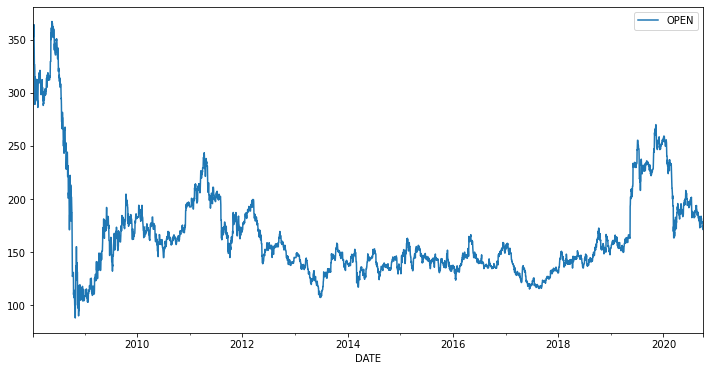

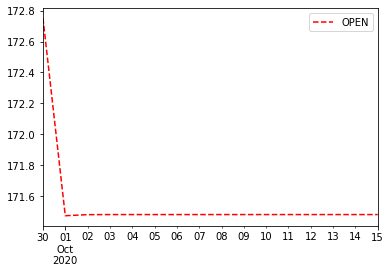

In [74]:
dt.plot(figsize=(12,6))
pred.plot(style='r--')
plt.show()

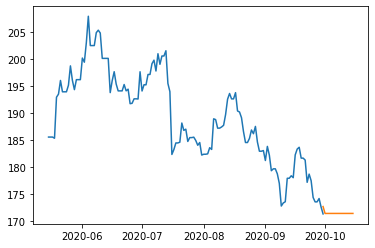

In [75]:
plt.plot(dt['2020-05-15':])
plt.plot(pred)
plt.show()